In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
from utils.fuzzy_utils import de_A, u_A
from Simulacion import Simulacion_CLD

1. La planta

2. Controlador (CLD)

Se definen los valores difusos y las reglas difusas.

In [2]:
# Valores difusos trapezoidales
# TODO dejar la implementacion que quede más simple de usar

Fuzzy_Values = {
    "Ng" : (-1.0, -1.0, -0.8, -0.6),
    "Nm" : (-0.8, -0.6, -0.4, -0.2),
    "Np" : (-0.5, -0.4, -0.2, -0.1),
    "Ni" : (-0.2, -0.1, 0.0, 0.0),
    "Ce" : (-0.1, 0.0, 0.0, 0.1),
    "Pi" : (0.0, 0.0, 0.1, 0.2),
    "Pp" : (0.1, 0.2, 0.4, 0.5),
    "Pm" : (0.4, 0.4, 0.6, 0.8),
    "Pg" : (0.6, 0.8, 1.0, 1.0)
}

In [3]:
# Se definen conjuntos de_A necesarios
All_Fuzzy_Values = Fuzzy_Values.copy()
All_Fuzzy_Values["de_A_Ng_Pp"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Pp"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Ng_Np"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Np"])
All_Fuzzy_Values["de_A_Np_Pi"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Ng_Nm"] = de_A(Fuzzy_Values["Ng"], Fuzzy_Values["Nm"])
All_Fuzzy_Values["de_A_Pm_Pg"] = de_A(Fuzzy_Values["Pm"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])
All_Fuzzy_Values["de_A_Np_Pg"] = de_A(Fuzzy_Values["Np"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Pp_Pg"] = de_A(Fuzzy_Values["Pp"], Fuzzy_Values["Pg"])
All_Fuzzy_Values["de_A_Ni_Pi"] = de_A(Fuzzy_Values["Ni"], Fuzzy_Values["Pi"])

# Función para crear un vector con los grados de pertenencia a cierto conjunto en un dominio dado.
pertenencia_conjunto = lambda A, dominio: np.array(list(map(lambda x: u_A(A, x), dominio)))

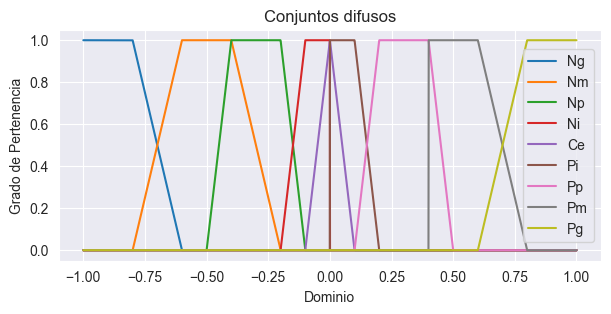

In [4]:
# Gráfico de conjuntos difusos.
dominio = np.linspace(-1, 1, 2000)
fig = plt.figure(figsize=(7, 3))
for name, A in Fuzzy_Values.items():
    plt.plot(dominio, pertenencia_conjunto(A, dominio), label=name)
plt.title("Conjuntos difusos")
plt.xlabel("Dominio")
plt.ylabel("Grado de Pertenencia")
plt.legend()
plt.show()

In [5]:
# Mapa de reglas en base a 2 variables difusas: EP y TP. Salida es deltaH.
mapa_reglas = {}

# Regla 1
mapa_reglas[(All_Fuzzy_Values["Ng"], All_Fuzzy_Values["de_A_Ng_Pp"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 2
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Nm"], All_Fuzzy_Values["de_A_Ng_Np"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 3
mapa_reglas[(All_Fuzzy_Values["Np"], All_Fuzzy_Values["de_A_Np_Pi"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 4
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pm"]
print(len(mapa_reglas), end=", ")
# Regla 5
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 6
mapa_reglas[(All_Fuzzy_Values["de_A_Ni_Pi"], All_Fuzzy_Values["Ce"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 7
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 8
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 9
mapa_reglas[(All_Fuzzy_Values["Pp"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 10
mapa_reglas[(All_Fuzzy_Values["de_A_Pm_Pg"], All_Fuzzy_Values["de_A_Pp_Pg"])] = All_Fuzzy_Values["Nm"]
print(len(mapa_reglas), end=", ")
# Regla 11
mapa_reglas[(All_Fuzzy_Values["Pg"], All_Fuzzy_Values["de_A_Np_Pg"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas), end=", ")
# Regla 12
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 13
mapa_reglas[(All_Fuzzy_Values["Ni"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Pp"]
print(len(mapa_reglas), end=", ")
# Regla 14
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Np"])] = All_Fuzzy_Values["Ce"]
print(len(mapa_reglas), end=", ")
# Regla 15
mapa_reglas[(All_Fuzzy_Values["Pi"], All_Fuzzy_Values["Pp"])] = All_Fuzzy_Values["Np"]
print(len(mapa_reglas), end=", ")
# Regla 16
mapa_reglas[(All_Fuzzy_Values["de_A_Ng_Np"], All_Fuzzy_Values["de_A_Pm_Pg"])] = All_Fuzzy_Values["Pg"]
print(len(mapa_reglas), end=", ")
# Regla 17
mapa_reglas[(All_Fuzzy_Values["de_A_Pp_Pg"], All_Fuzzy_Values["de_A_Ng_Nm"])] = All_Fuzzy_Values["Ng"]
print(len(mapa_reglas))

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17


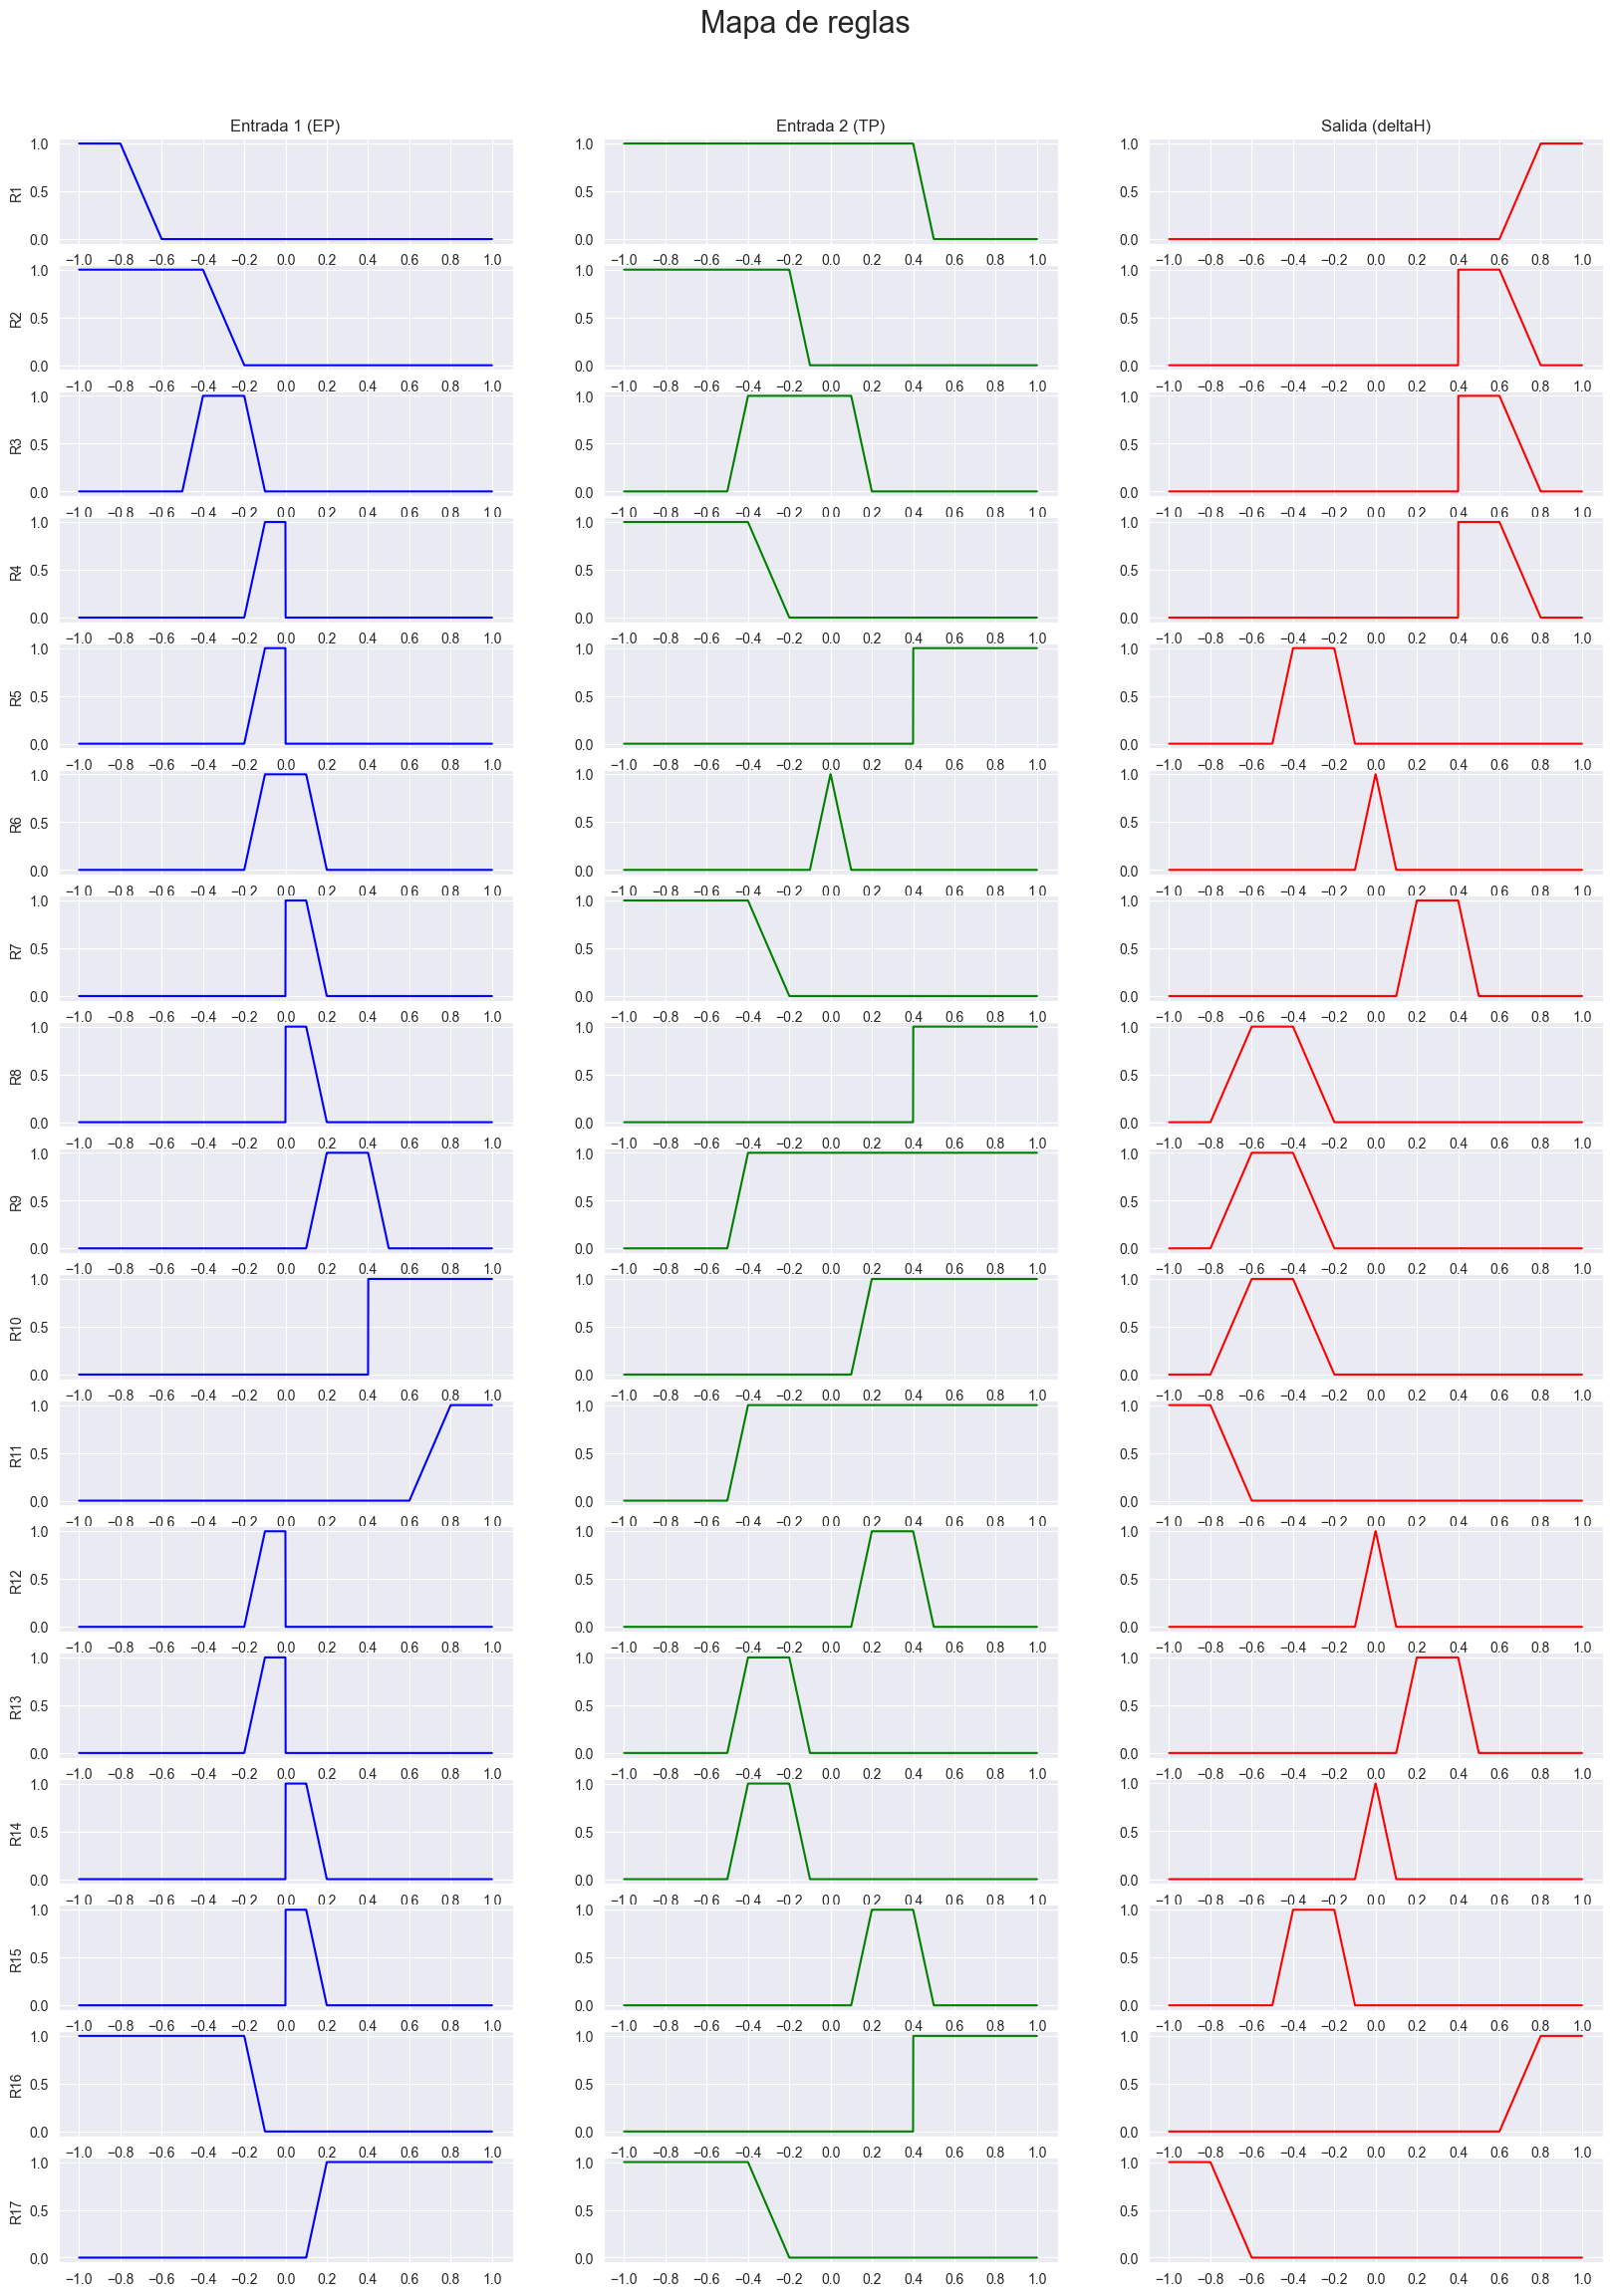

In [6]:
# Gráfico de reglas difusas
dominio = np.linspace(-1, 1, 2000)
grafico_conjunto = lambda C: np.array(list(map(lambda x: u_A(C, x), dominio)))

fig, ax = plt.subplots(nrows=17, ncols=3, figsize=(20,26))
for i, (A, B) in enumerate(mapa_reglas.keys()):
    ax[i, 0].set_ylabel(f"R{i+1}")
    ax[i, 0].plot(dominio, grafico_conjunto(A), color="b")
    ax[i, 1].plot(dominio, grafico_conjunto(B), color="g")
    ax[i, 2].plot(dominio, grafico_conjunto(mapa_reglas[(A, B)]), color="r")


    plt.sca(ax[i, 0])
    plt.xticks(np.linspace(-1,1,11))
    plt.sca(ax[i, 1])
    plt.xticks(np.linspace(-1,1,11))
    plt.sca(ax[i, 2])
    plt.xticks(np.linspace(-1,1,11))

ax[0,0].set_title("Entrada 1 (EP)")
ax[0,1].set_title("Entrada 2 (TP)")
ax[0,2].set_title("Salida (deltaH)")

# Use the pyplot interface to change just one subplot...


plt.subplots_adjust(top=0.93)  # Parámetro que hace que se vea bien
plt.suptitle("Mapa de reglas", fontsize=22)

plt.show()


### a) Realizar un mapa de reglas EP x TP para la planta.

In [7]:
# dataframe que contendra el mapa de reglas E2 columnas E1 Index
map_rules = pd.DataFrame(columns=Fuzzy_Values.keys(), index=Fuzzy_Values.keys())
# diccionario que intercambia las llaves y valores del Fuzzy_Values, conjunto trapecio -> nombre conjunto
inverted_Fuzzy_Values = {value: key for key, value in Fuzzy_Values.items()}
# Se itera por E1
for E1 in map_rules.index:
    # Se itera por E2
    for E2 in map_rules.columns:
        # Se extraen los conjuntos trapezoidales
        conjunto_E1 = Fuzzy_Values[E1]
        conjunto_E2 = Fuzzy_Values[E2]
        # se crea la lista donde ira el conjunto resultante de la activacion de ambas entradas
        map_rules.loc[E1,E2] = []
        # Se itera por regla
        for i, (regla_EP, regla_TP) in enumerate(mapa_reglas.keys()):
            # Se busca que los elementos E1 y E2 no tengan intersección vacía con las reglas 
            con_E1 =  ( min(regla_EP) <= min(conjunto_E1) < max(regla_EP) ) or ( min(regla_EP) < max(conjunto_E1) <= max(regla_EP) )
            con_E2 =  ( min(regla_TP) <= min(conjunto_E2) < max(regla_TP) ) or ( min(regla_TP) < max(conjunto_E2) <= max(regla_TP) )
            # caso donde hay intersección
            if con_E1 and con_E2:
                # Se extraen los elementos de la celda
                lista = map_rules.loc[E1,E2] 
                # Se extraen el nombre del conjunto trapezoidal 
                conjunto = inverted_Fuzzy_Values[mapa_reglas[regla_EP, regla_TP]]
                # Se añade a la lista
                lista.append(inverted_Fuzzy_Values[mapa_reglas[regla_EP, regla_TP]])
                # Se reescribe el valor de la celda
                map_rules.loc[E1,E2] = lista

map_rules

,Ng,Nm,Np,Ni,Ce,Pi,Pp,Pm,Pg
Ng,"[Pg, Pm]","[Pg, Pm]","[Pg, Pm]","[Pg, Pm]",[Pg],[Pg],"[Pg, Pg]","[Pg, Pg]",[Pg]
Nm,"[Pg, Pm]","[Pg, Pm, Pm]","[Pg, Pm, Pm]","[Pg, Pm, Pm]","[Pg, Pm]","[Pg, Pm]","[Pg, Pm, Pg]","[Pg, Pg]",[Pg]
Np,"[Pm, Pm]","[Pm, Pm, Pm, Pp]","[Pm, Pm, Pm, Pp]","[Pm, Pm, Ce, Pp]","[Pm, Ce]","[Pm, Ce, Ce]","[Pm, Np, Ce, Pg]","[Np, Ce, Pg]","[Np, Pg]"
Ni,[Pm],"[Pm, Pm, Pp]","[Pm, Pm, Pp]","[Pm, Ce, Pp]","[Pm, Ce]","[Pm, Ce, Ce]","[Pm, Np, Ce, Pg]","[Np, Ce, Pg]","[Np, Pg]"
Ce,"[Pm, Pp]","[Pm, Pp, Pp, Ce]","[Pm, Pp, Pp, Ce]","[Ce, Pp, Ce]",[Ce],"[Ce, Ce, Np]","[Np, Nm, Ce, Np]","[Np, Nm, Ce, Np]","[Np, Nm]"
Pi,"[Pp, Ng]","[Pp, Nm, Ce, Ng]","[Pp, Nm, Ce, Ng]","[Ce, Nm, Ce]","[Ce, Nm]","[Ce, Nm, Np]","[Nm, Nm, Np]","[Nm, Nm, Np]","[Nm, Nm]"
Pp,"[Pp, Ng]","[Pp, Nm, Ce, Ng]","[Pp, Nm, Ce, Ng]","[Ce, Nm, Ce]","[Ce, Nm]","[Ce, Nm, Nm, Np]","[Nm, Nm, Nm, Np]","[Nm, Nm, Nm, Np]","[Nm, Nm, Nm]"
Pm,[Ng],"[Nm, Ng, Ng]","[Nm, Ng, Ng]","[Nm, Ng]","[Nm, Ng]","[Nm, Nm, Ng]","[Nm, Nm, Ng]","[Nm, Nm, Ng]","[Nm, Nm, Ng]"
Pg,[Ng],"[Ng, Ng]","[Ng, Ng]",[Ng],[Ng],"[Nm, Ng]","[Nm, Ng]","[Nm, Ng]","[Nm, Ng]"


### b) Utilizando las presiones objetivos dadas y los métodos de des-difusión anteriores, simule la planta y el CLD y muestre los resultados en un gráfico de P(t) vs. T. Compare los resultados para la planta en cada caso. Recuerde que se trata de funciones discretas al momento de graficar. Indique que método de desdifusión es mejor en cada caso.

### c) Indique la secuencia de disparo de las reglas, y cuál es el aporte de cada regla en la salida del controlador. Esta información se puede obtener monitoreando en cada iteración la medida de posibilidad del consecuente de cada regla, que se evalúa de acuerdo al estado dado por EP(t) y TP(t).

### d) Muestre la trayectoria de la planta en el mapa de reglas sobre el plano EP x TP, asociando el estado a la regla con mayor "encaje" (la regla que más contribuye a la salida del controlador). En caso de que más de una regla presente el mayor encaje, señálelas claramente, y use la frontera entre reglas como punto de iteración.

In [41]:
def trayectoria(ruta_plano, ruta_reglas, plots =[True, True]):

    data_participacion = pd.read_csv(ruta_reglas, index_col=0)
    if plots[0]:
        plt.figure(figsize=(10,5))
        plt.ylabel("Reglas")
        plt.xlabel("Tiempo")
        sns.heatmap(data_participacion.T)
        plt.show()

    max_columnas = []

    # Recorremos las filas del DataFrame
    for indice, fila in data_participacion.iterrows():
        max_columnas.append(fila[fila==max(fila)].index.to_list())
    

    data_participacion = pd.read_csv(ruta_plano, index_col=0)
    # data_participacion= data_participacion.drop("Unnamed: 0", axis=1)
    EP_list = data_participacion["EP"]
    TP_list = data_participacion["TP"]
    if plots[1]:
        plt.plot(EP_list, TP_list, "-o", alpha=0.2)
        plt.xlim([-1.1,1.1])
        plt.ylim([-1.1,1.1])
        plt.ylabel("TP[Pa]")
        plt.xlabel("EP[Pa]")
        for i, reglas in enumerate(max_columnas):
            if len(reglas)<3:
                text = ', '.join(str(regla) for regla in reglas)
                plt.text(EP_list[i], TP_list[i]+0.05, text, fontsize=10)
        plt.show()

    

In [9]:
# Se definen condiciones iniciales y restricciones para los valores difusos.
T = 50  # (s) Tiempo de simulación
fs = 1  # (Hz) frecuencia de muestreo de simulación
rango_EP = [-15, 15]  # Rango de error de presión
rango_TP = [-15, 15]  # Rango de tasa de error de presión
rango_deltaH = [-15, 15]  # Rango de deltaH
K = 0.6  # Constante P=K*H
P_obj = 750  # (Pa) Presión objetivo

#### 1) Condición inicial P(0) = 630 

In [10]:
P_inicial = 630 # (Pa) Presión inicial

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


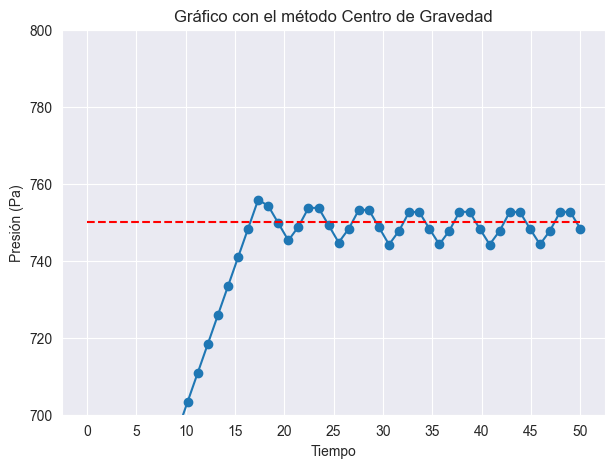

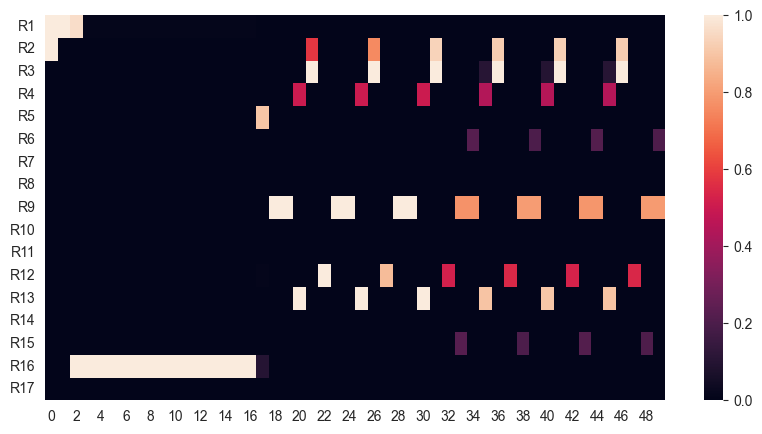

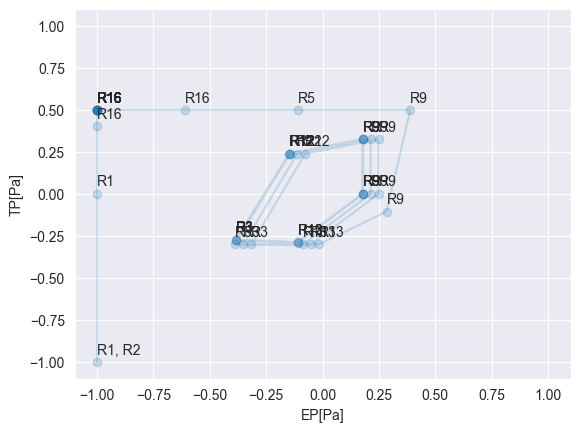

In [11]:
metodo_desdifusion = "CG"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


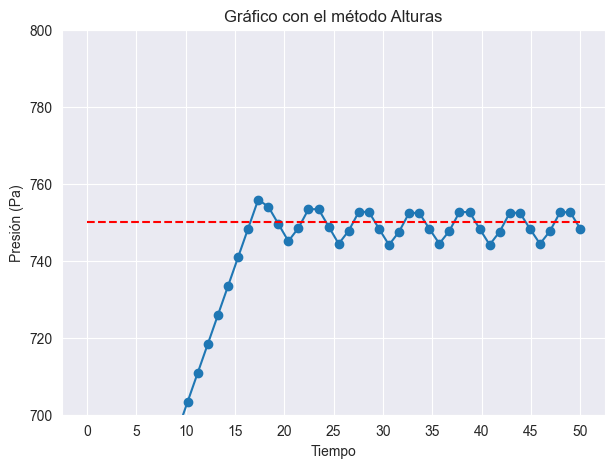

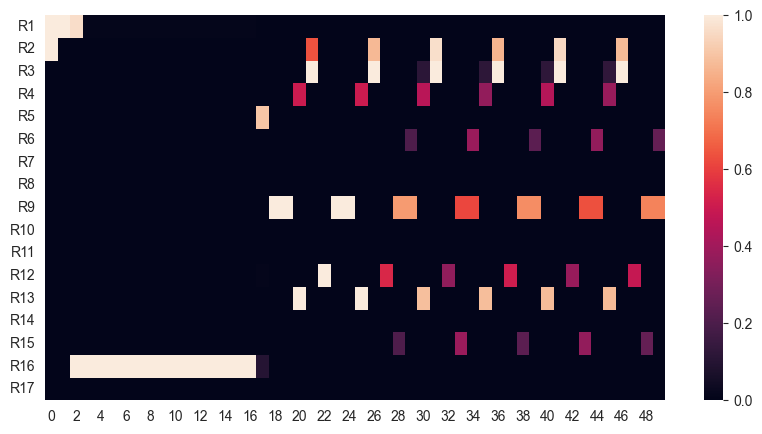

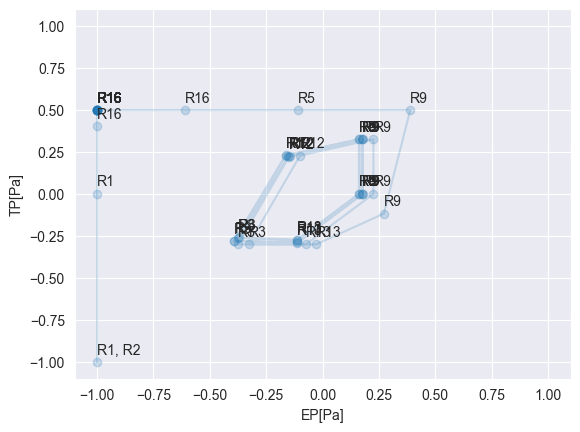

In [12]:
metodo_desdifusion = "A"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


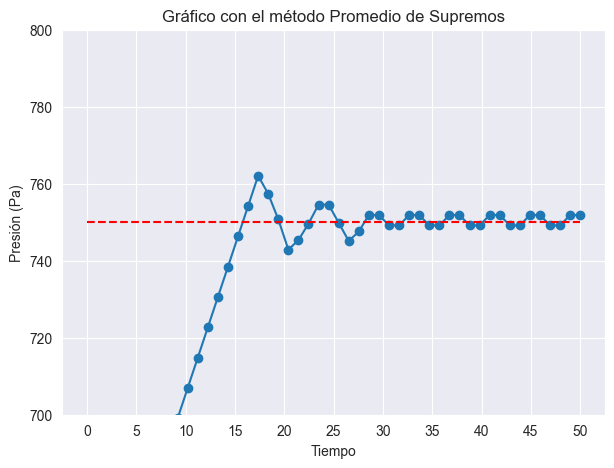

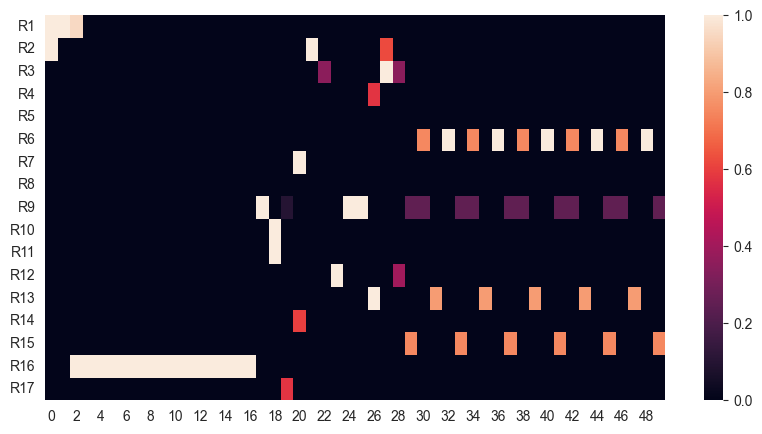

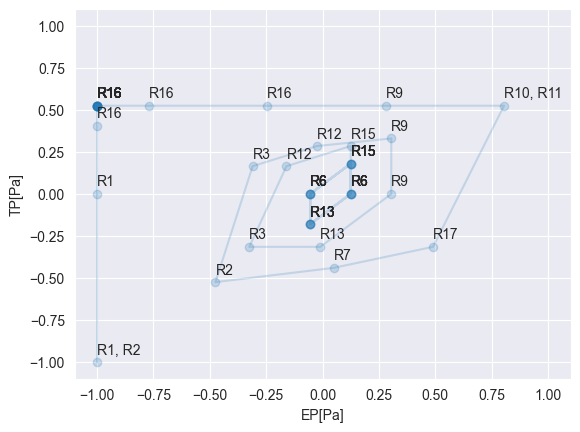

In [13]:
metodo_desdifusion = "PS"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")


#### 2) Condición inicial P(0) = 720 

In [14]:
P_inicial = 720 # (Pa) Presión inicial

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


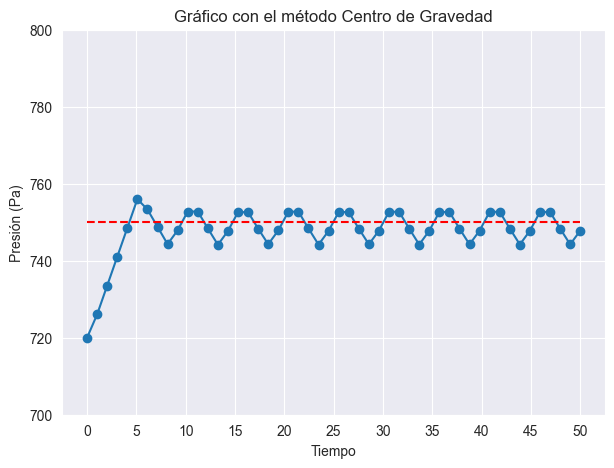

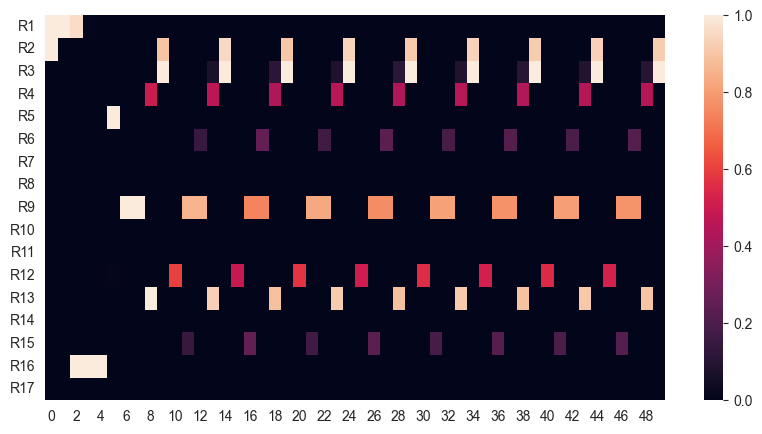

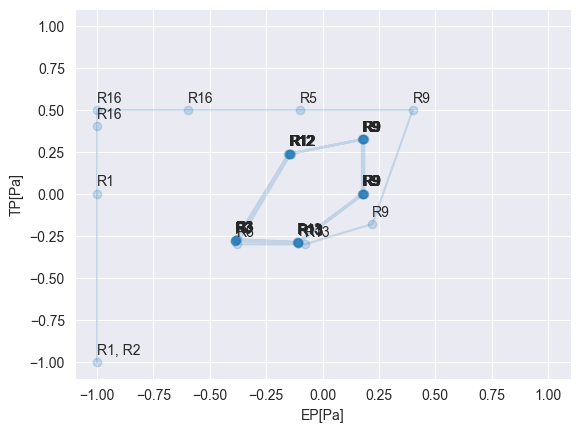

In [15]:
metodo_desdifusion = "CG"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


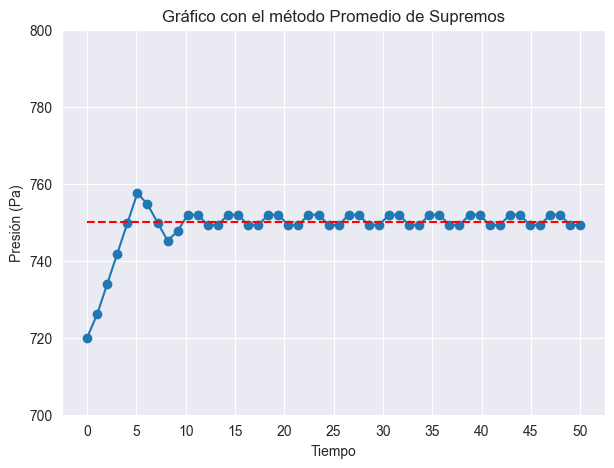

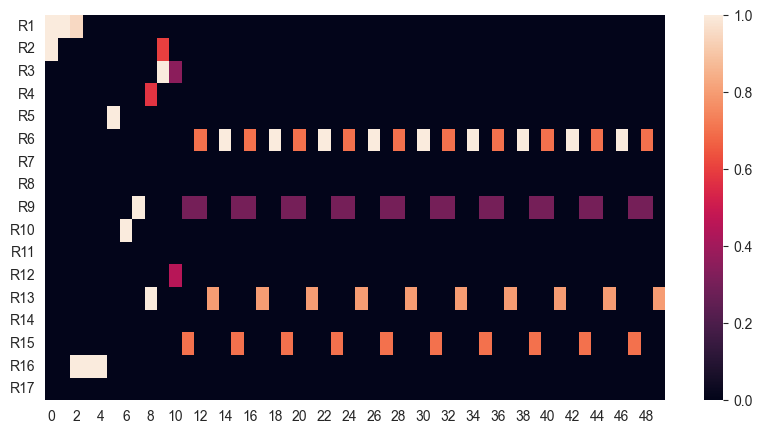

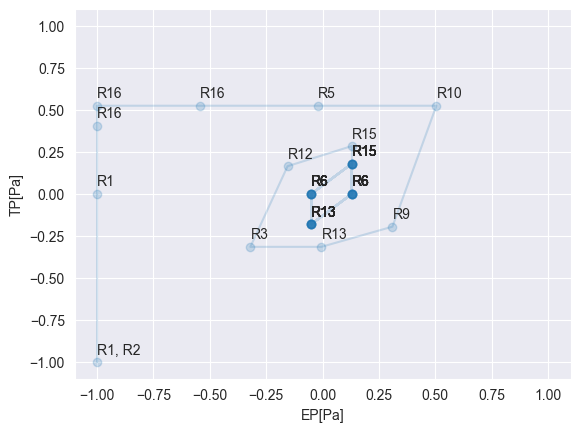

In [16]:
metodo_desdifusion = "PS"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


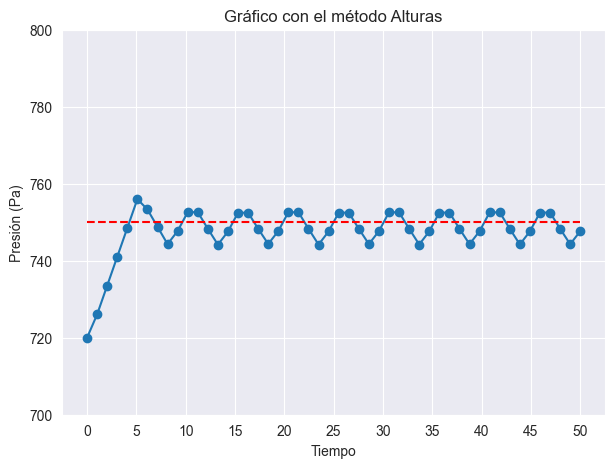

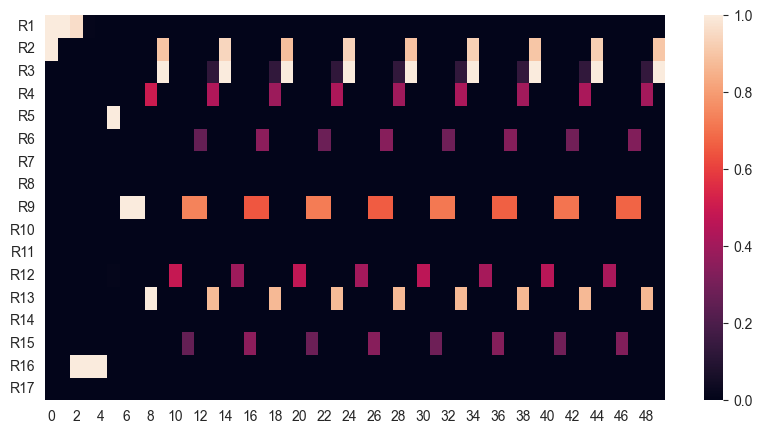

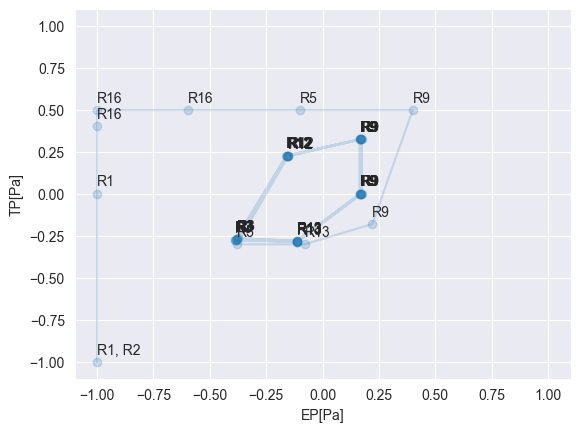

In [17]:
metodo_desdifusion = "A"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

#### 3) Condición inicial P(0) = 830 

In [18]:
P_inicial = 830 # (Pa) Presión inicial

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


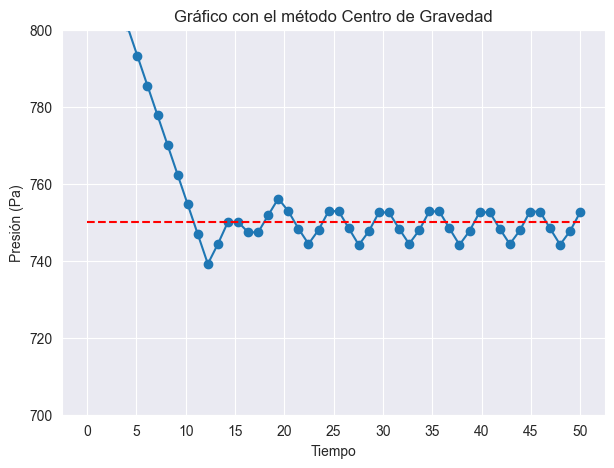

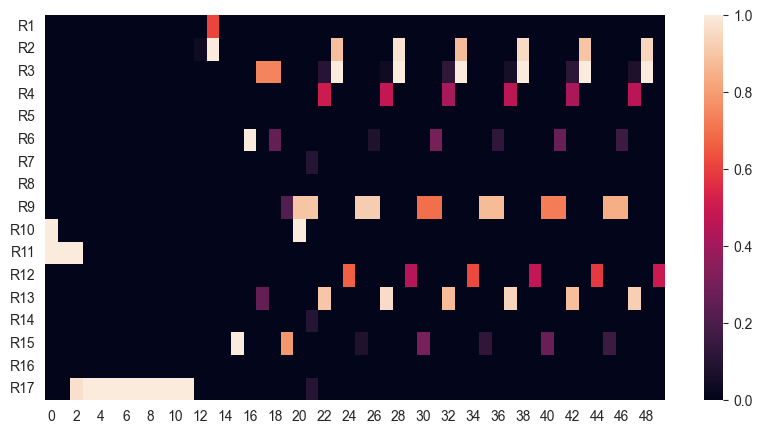

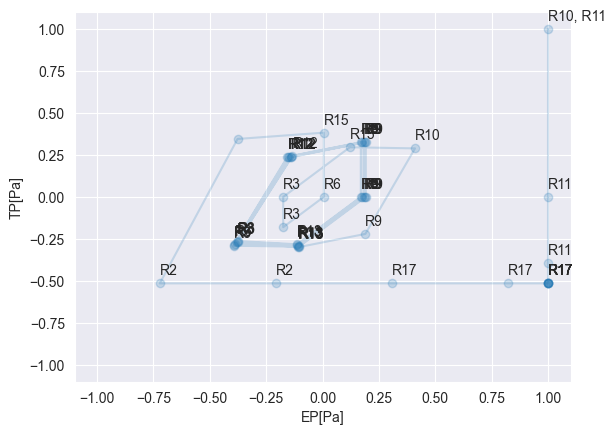

In [19]:
metodo_desdifusion = "CG"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


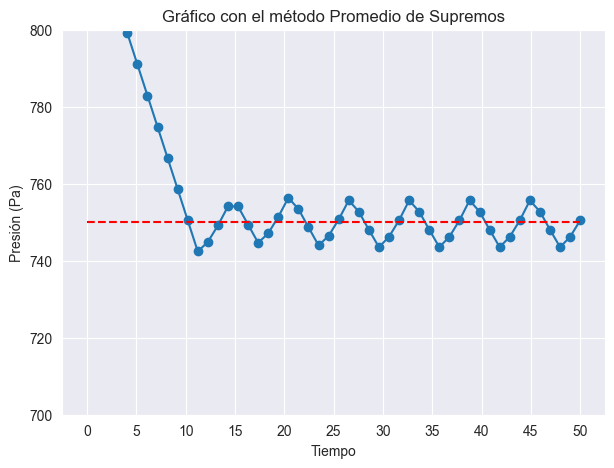

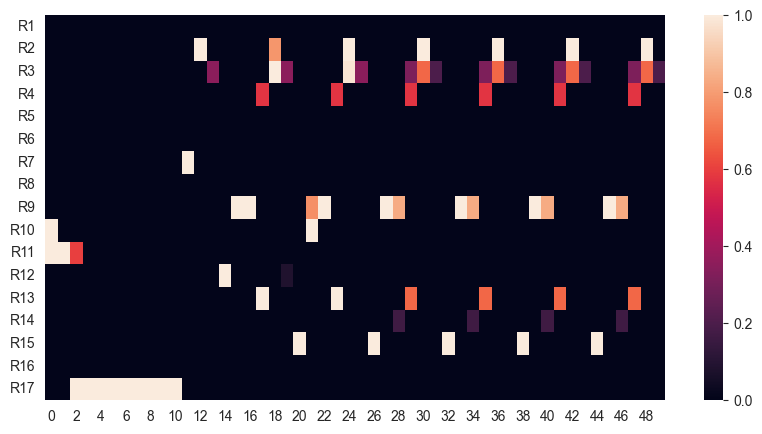

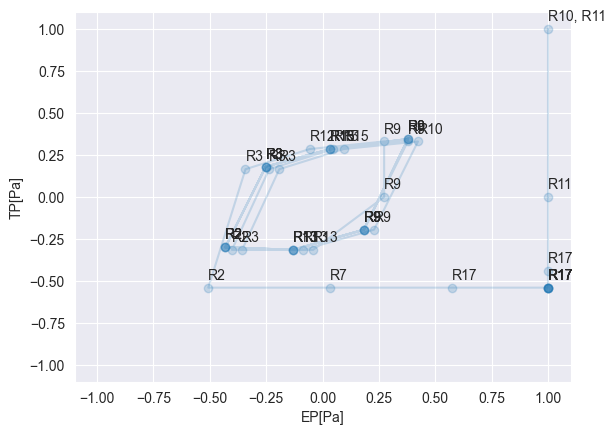

In [20]:
metodo_desdifusion = "PS"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


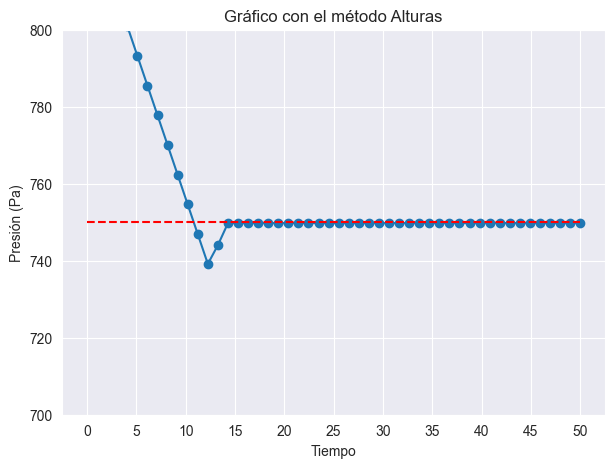

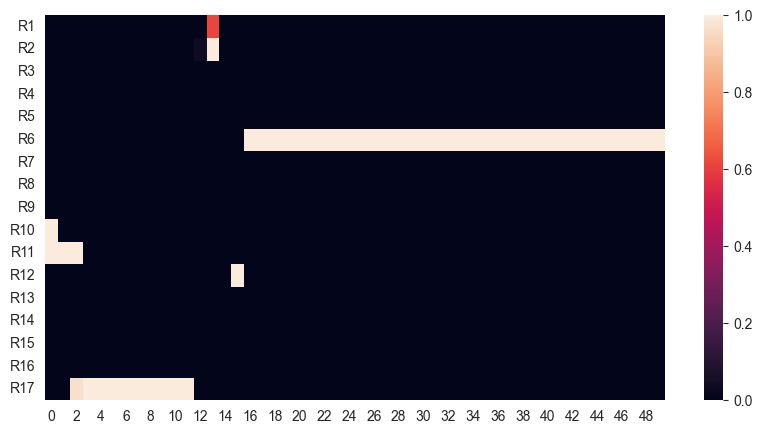

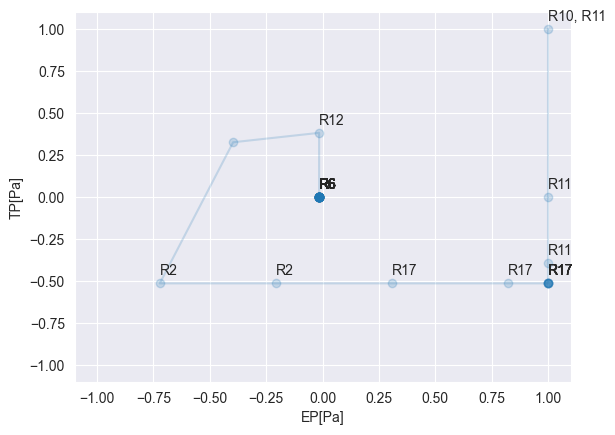

In [21]:
metodo_desdifusion = "A"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
CLD.plot_sim()
trayectoria("experimento1.csv", "regla_participacion_experimento1.csv")

### e) En el plano anterior, observe la convergencia al punto de equilibrio (idealmente EP = 0, TP = 0, o en su entorno). Elimine algunas reglas que estén en la trayectoria de la evolución del estado de la planta, es decir, alguna regla que haya contribuido a la salida del controlador en algunas iteraciones, y repita la simulación. Comente. ¿Es  obusto el CLD? ¿Las características de respuesta del CLD (tiempo de subida, precisión en régimen permanente, etc.) siguen siendo aceptables?

In [ ]:
def simulaciones(mapa_reglas, condiciones_iniciales =[630,720,830] ,metodos_desdifusion = ["PS", "CG", "A"],plots = [True, True, True]):
    for ci in condiciones_iniciales:
        print("-"*20)
        print(f"Condición inicial: {ci} Pa")
        print("-"*20)
        P_inicial = ci # (Pa) Presión inicial
        for metodo in metodos_desdifusion:
            print(f"Método de desdifución: {metodo}\n")

            metodo_desdifusion = metodo 
            CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="lineal")
            CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento1.csv")
            if plots[0]:
                CLD.plot_sim()
            trayectoria("experimento1.csv", "regla_participacion_experimento1.csv", plots[1:])

In [49]:
print(mapa_reglas)
mapa_reglas_copy = mapa_reglas.copy()

claves = list(mapa_reglas_copy.keys())

{((-1.0, -1.0, -0.8, -0.6), (-1.0, -1.0, 0.4, 0.5)): (0.6, 0.8, 1.0, 1.0), ((-1.0, -1.0, -0.4, -0.2), (-1.0, -1.0, -0.2, -0.1)): (0.4, 0.4, 0.6, 0.8), ((-0.5, -0.4, -0.2, -0.1), (-0.5, -0.4, 0.1, 0.2)): (0.4, 0.4, 0.6, 0.8), ((-0.2, -0.1, 0.0, 0.0), (-1.0, -1.0, -0.4, -0.2)): (0.4, 0.4, 0.6, 0.8), ((-0.2, -0.1, 0.0, 0.0), (0.4, 0.4, 1.0, 1.0)): (-0.5, -0.4, -0.2, -0.1), ((-0.2, -0.1, 0.1, 0.2), (-0.1, 0.0, 0.0, 0.1)): (-0.1, 0.0, 0.0, 0.1), ((0.0, 0.0, 0.1, 0.2), (-1.0, -1.0, -0.4, -0.2)): (0.1, 0.2, 0.4, 0.5), ((0.0, 0.0, 0.1, 0.2), (0.4, 0.4, 1.0, 1.0)): (-0.8, -0.6, -0.4, -0.2), ((0.1, 0.2, 0.4, 0.5), (-0.5, -0.4, 1.0, 1.0)): (-0.8, -0.6, -0.4, -0.2), ((0.4, 0.4, 1.0, 1.0), (0.1, 0.2, 1.0, 1.0)): (-0.8, -0.6, -0.4, -0.2), ((0.6, 0.8, 1.0, 1.0), (-0.5, -0.4, 1.0, 1.0)): (-1.0, -1.0, -0.8, -0.6), ((-0.2, -0.1, 0.0, 0.0), (0.1, 0.2, 0.4, 0.5)): (-0.1, 0.0, 0.0, 0.1), ((-0.2, -0.1, 0.0, 0.0), (-0.5, -0.4, -0.2, -0.1)): (0.1, 0.2, 0.4, 0.5), ((0.0, 0.0, 0.1, 0.2), (-0.5, -0.4, -0.2, -0.1

--------------------
Condición inicial: 630 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


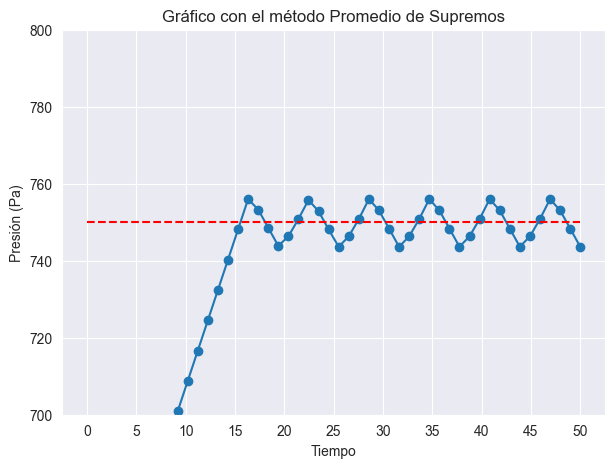

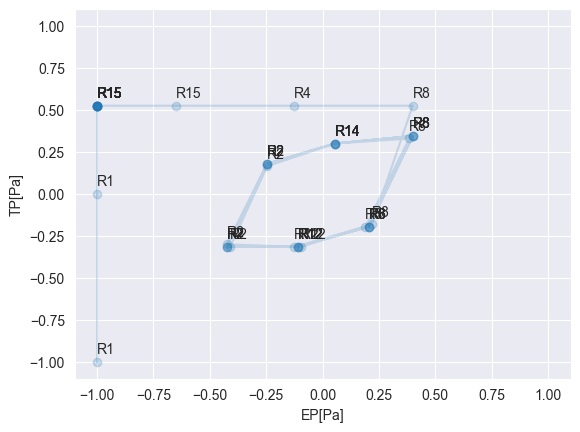

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


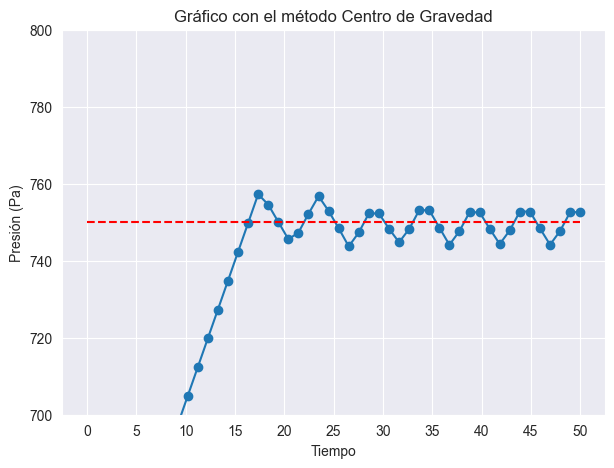

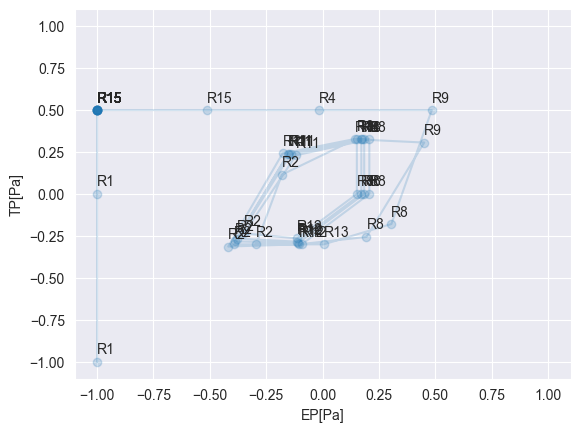

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


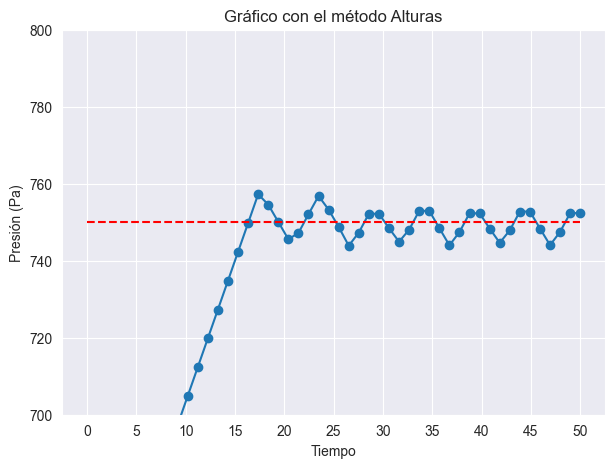

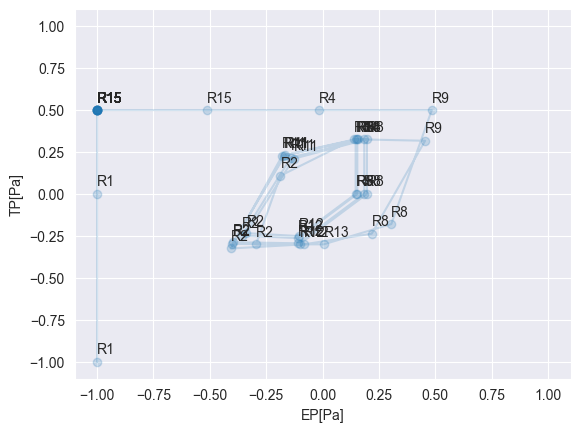

--------------------
Condición inicial: 720 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


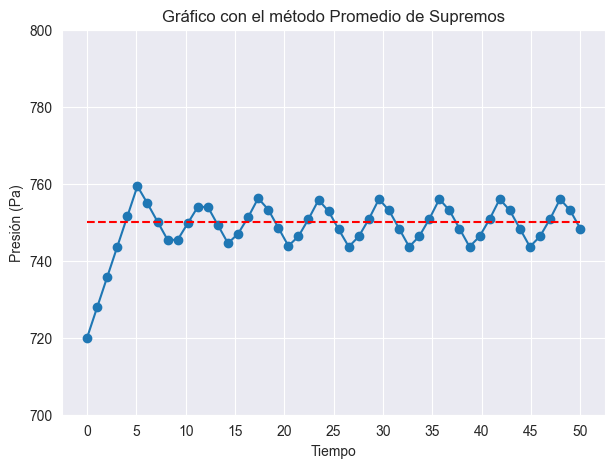

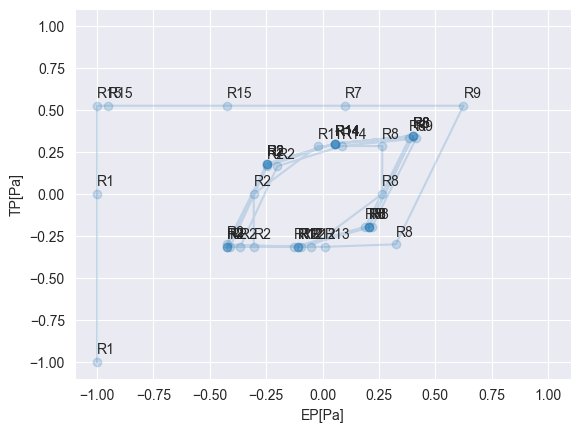

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


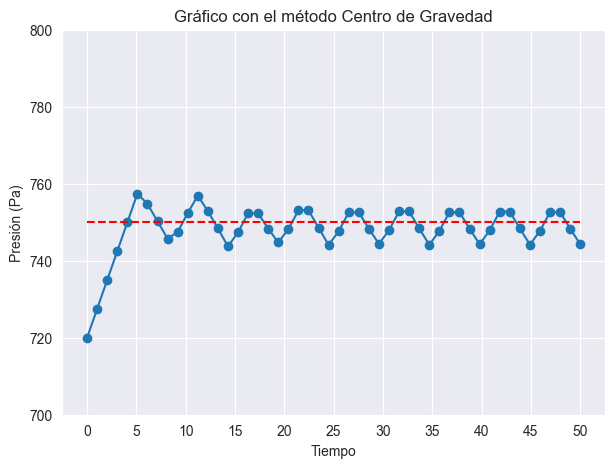

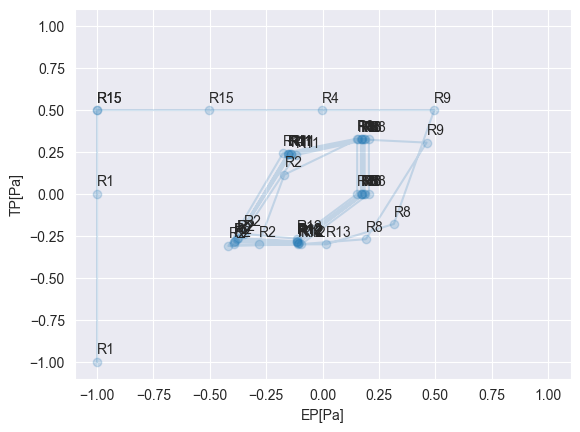

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


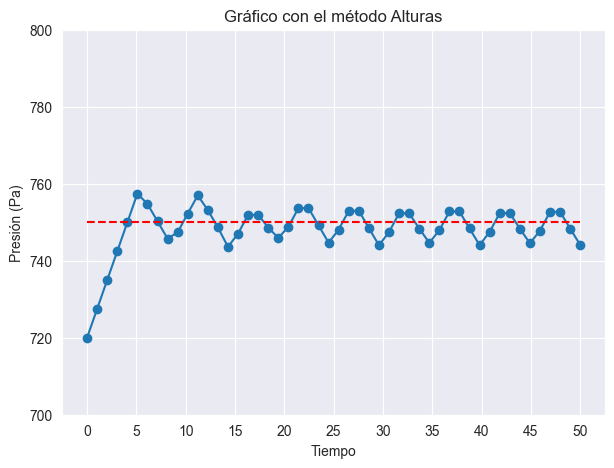

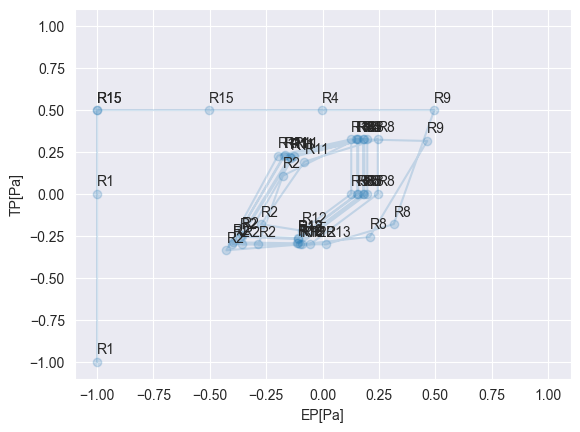

--------------------
Condición inicial: 830 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


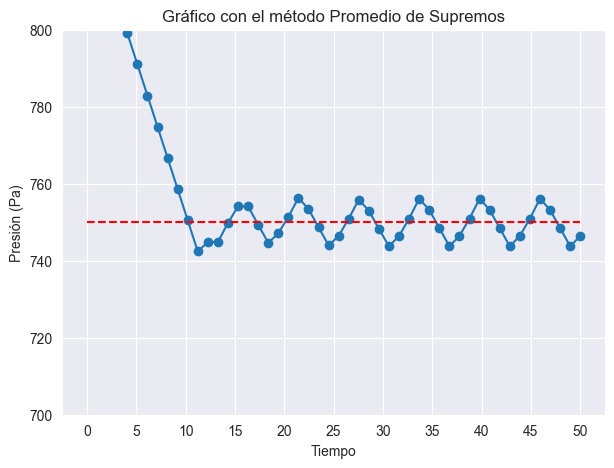

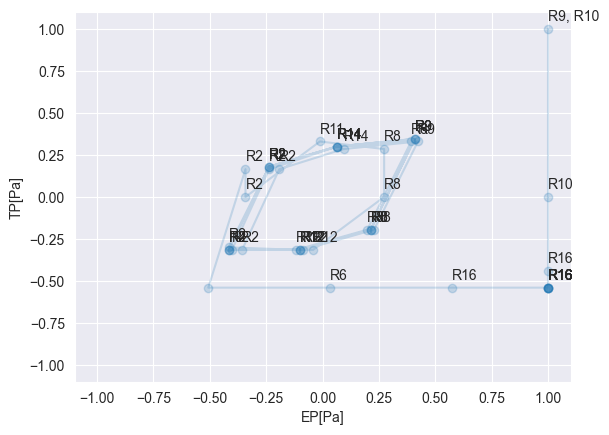

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


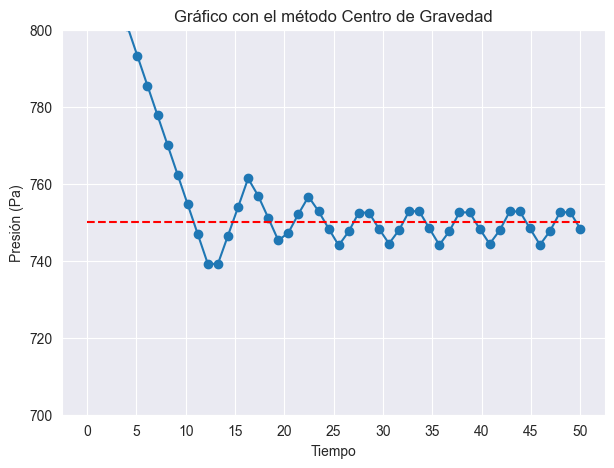

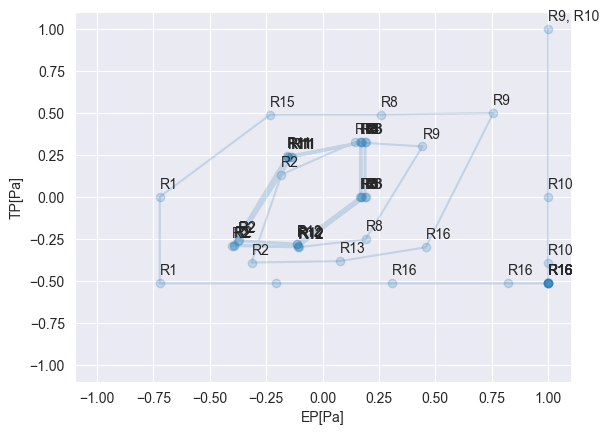

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


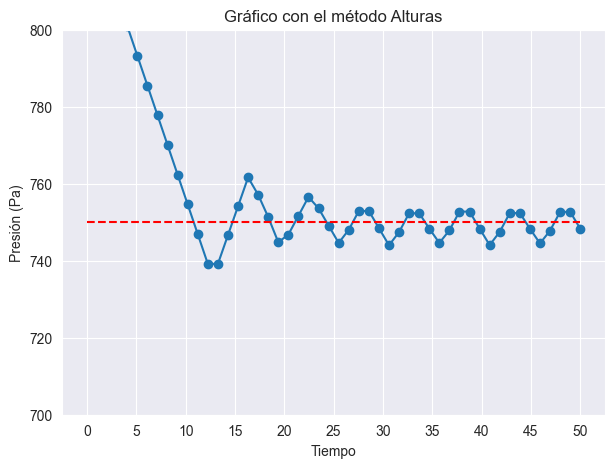

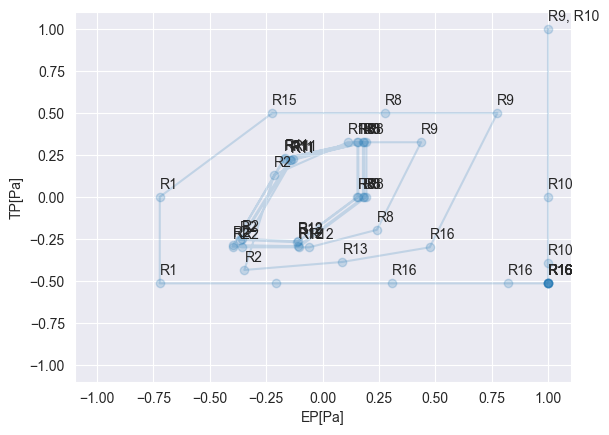

In [50]:
claves = list(mapa_reglas_copy.keys())
del mapa_reglas_copy[claves[1]]
simulaciones(mapa_reglas=mapa_reglas_copy, plots = [True, False, True])

--------------------
Condición inicial: 630 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


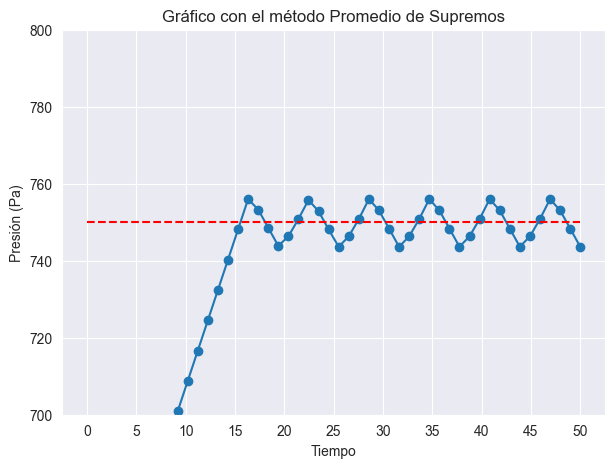

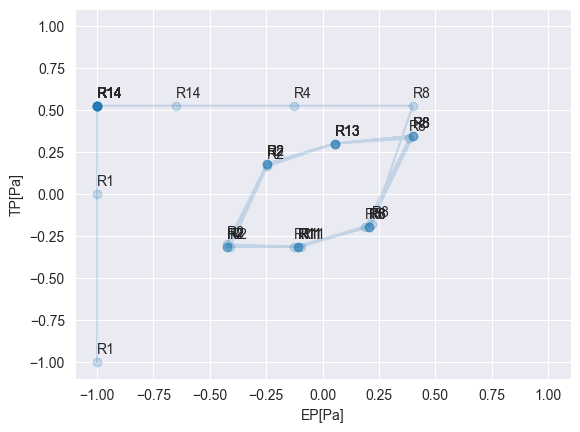

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


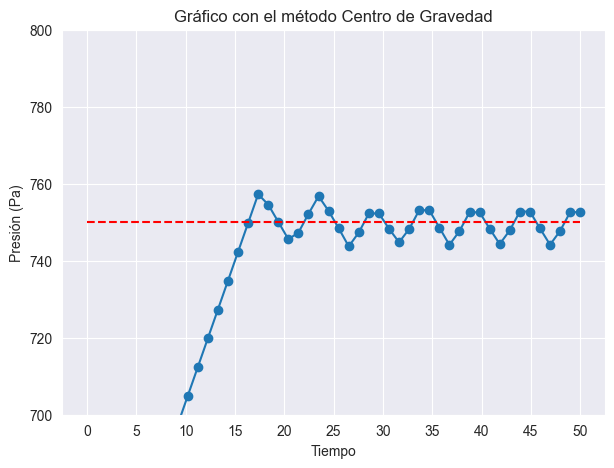

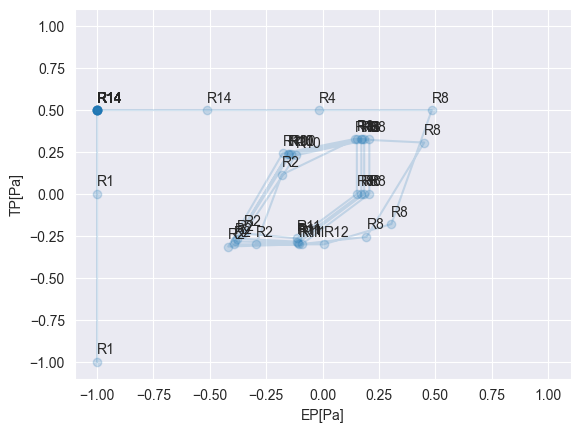

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


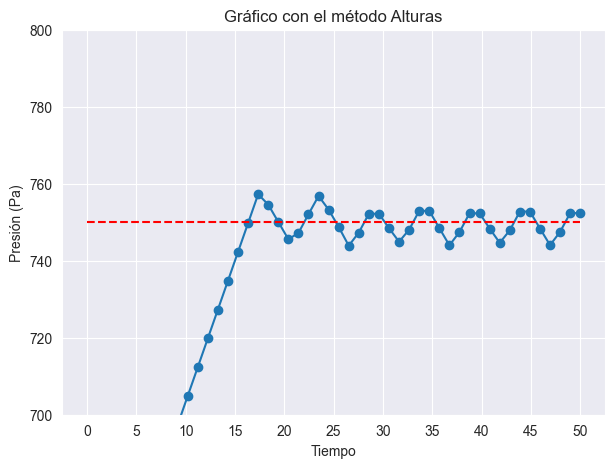

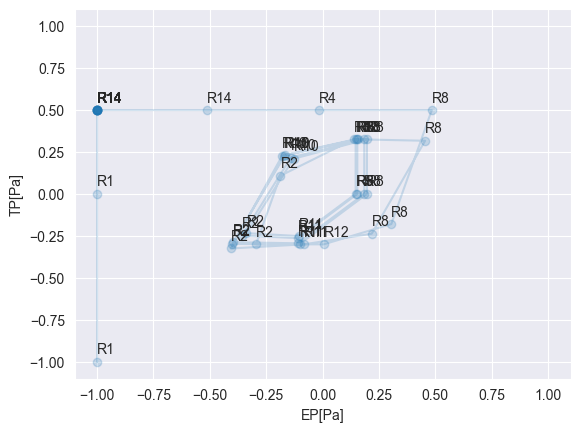

--------------------
Condición inicial: 720 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


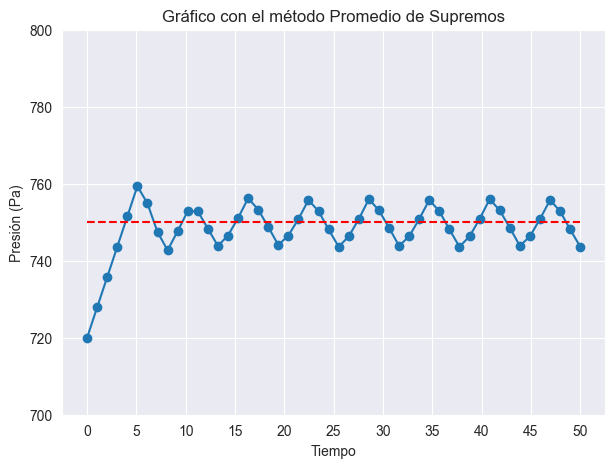

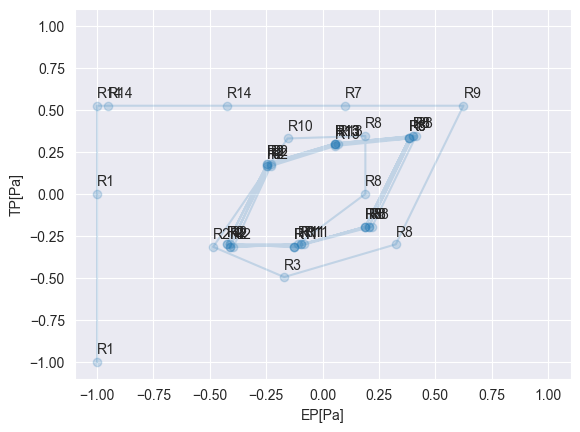

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


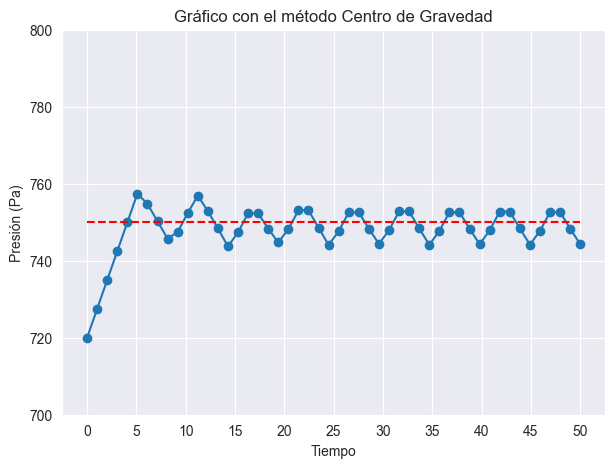

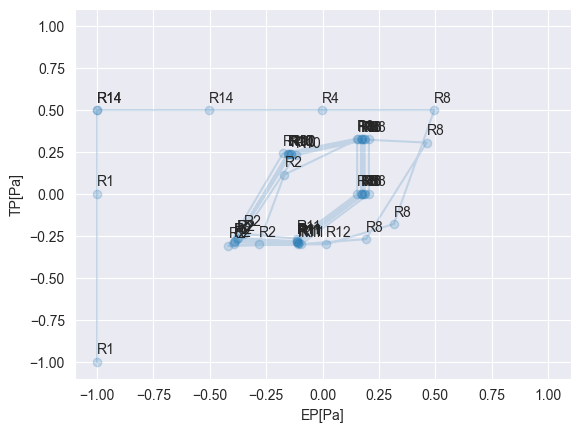

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


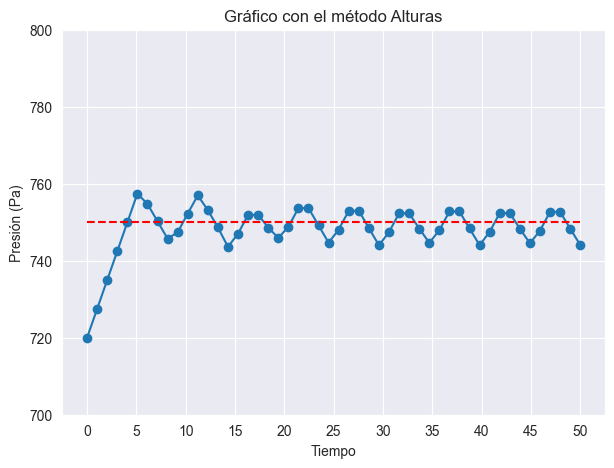

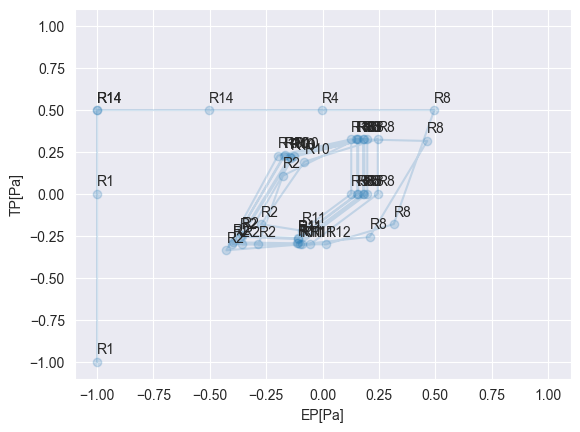

--------------------
Condición inicial: 830 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


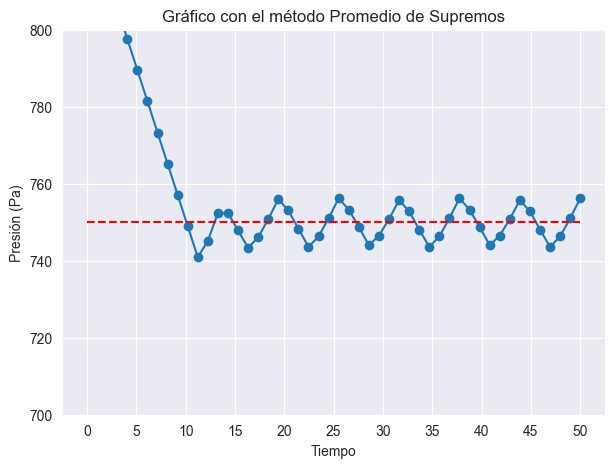

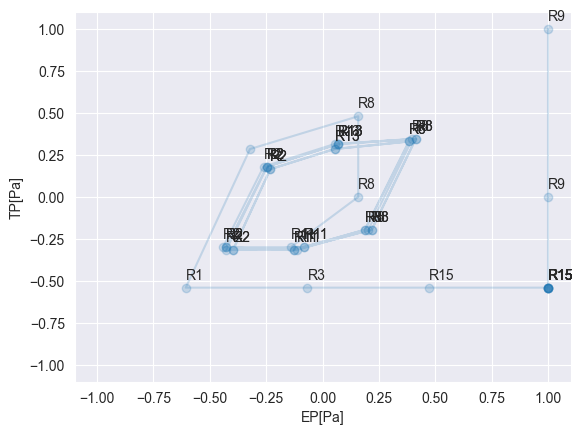

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


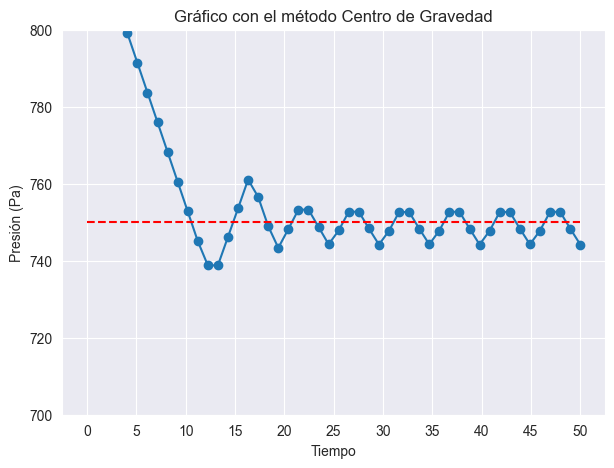

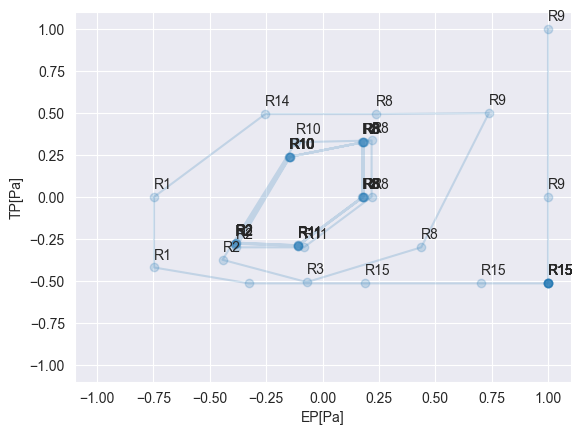

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


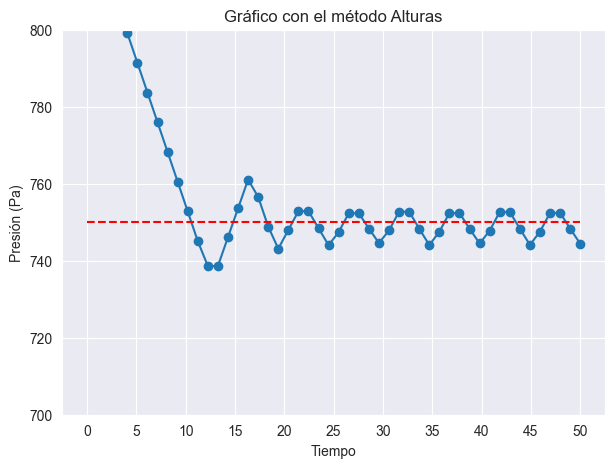

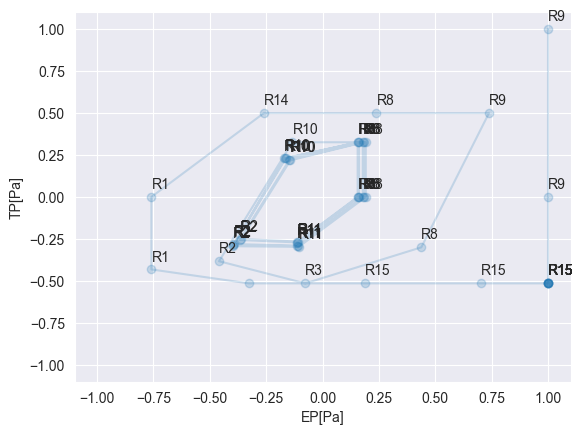

In [51]:
claves = list(mapa_reglas_copy.keys())
del mapa_reglas_copy[claves[8]]
simulaciones(mapa_reglas=mapa_reglas_copy, plots = [True, False, True])

--------------------
Condición inicial: 630 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


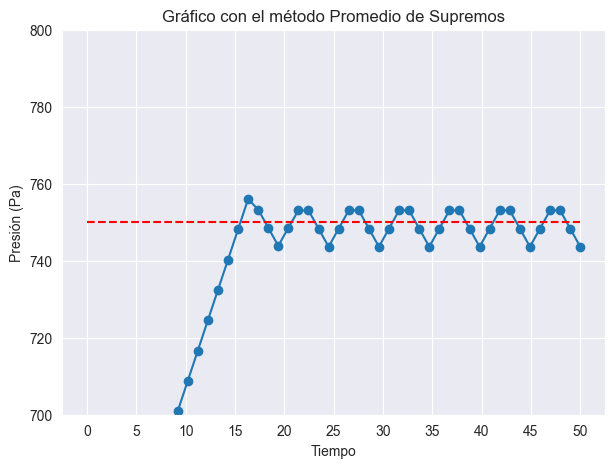

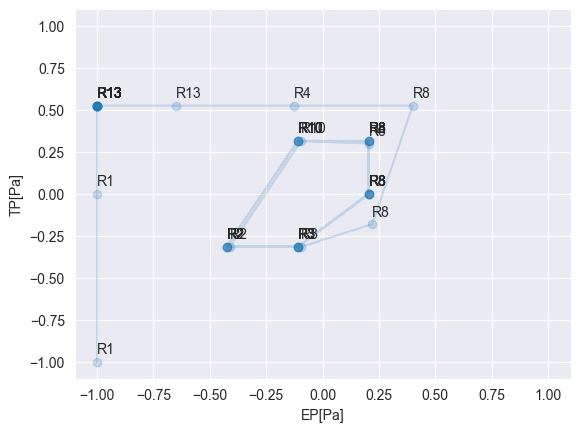

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


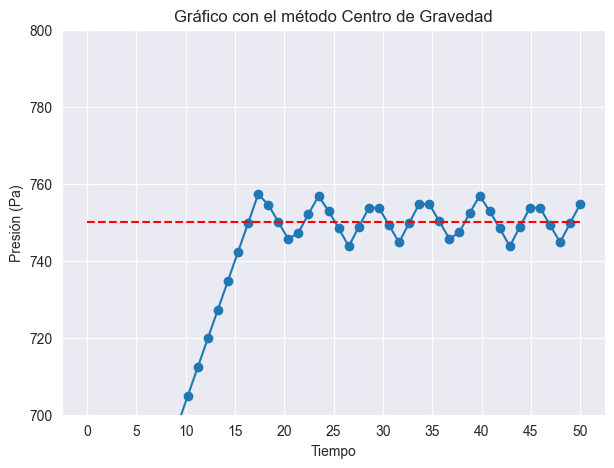

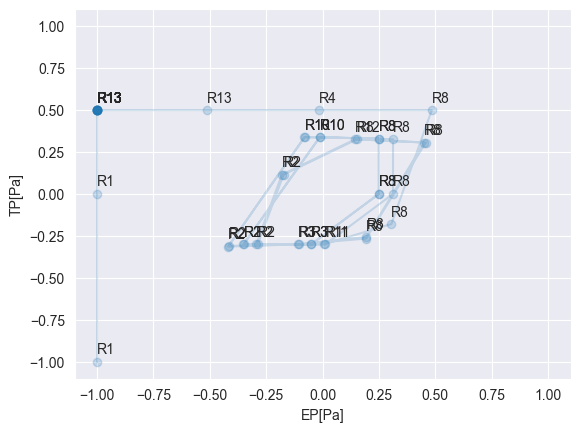

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 630 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


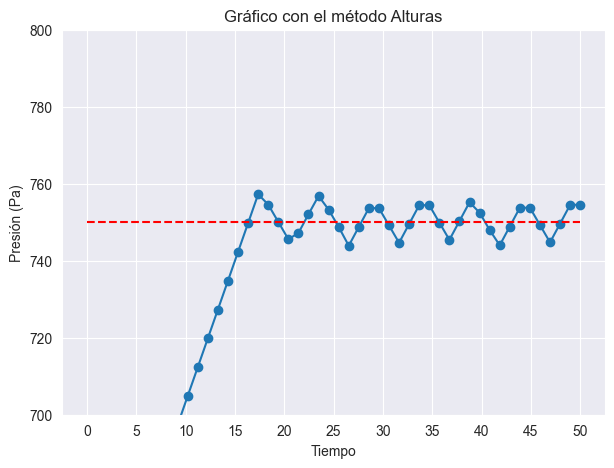

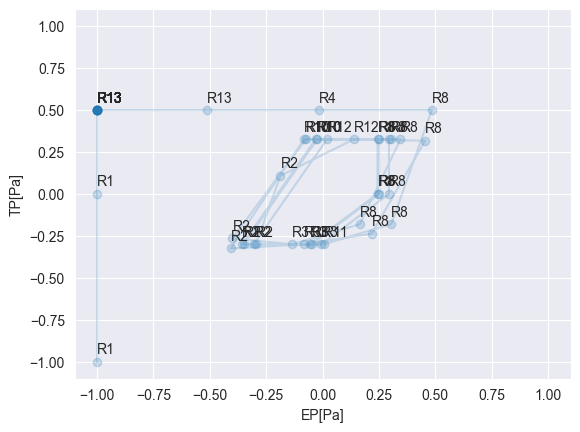

--------------------
Condición inicial: 720 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


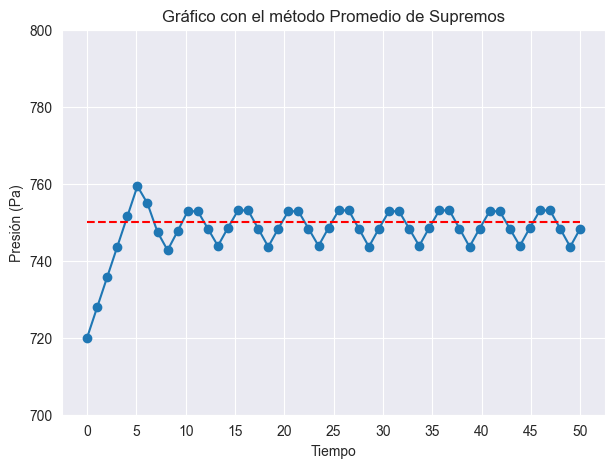

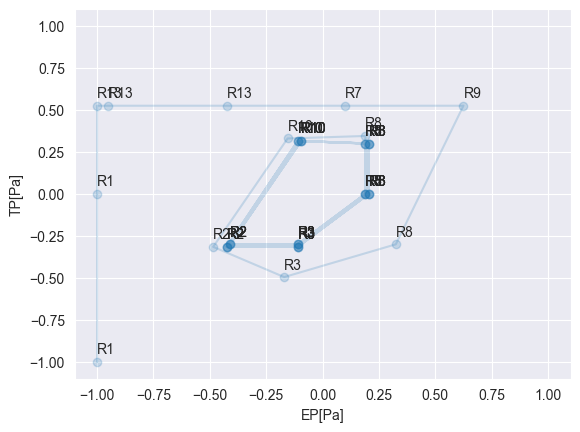

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


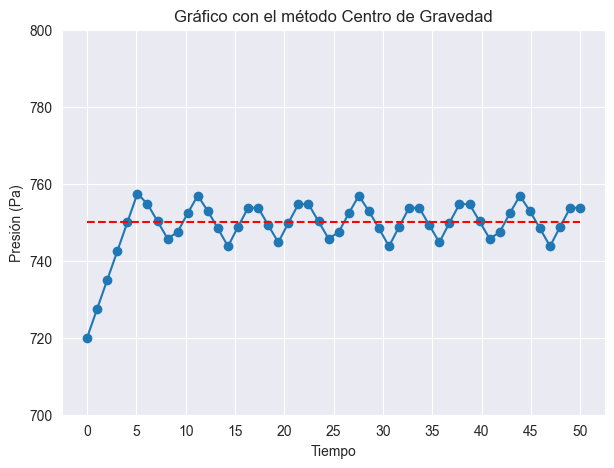

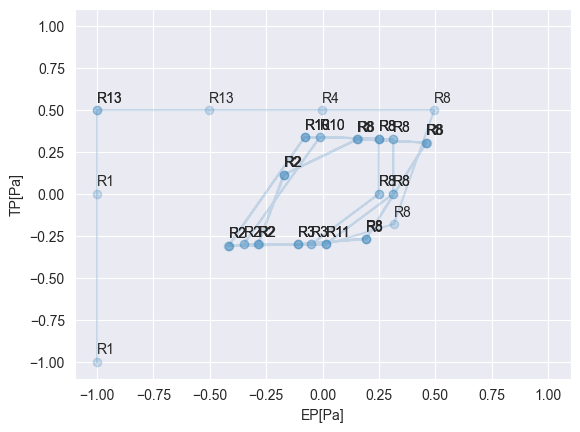

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 720 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


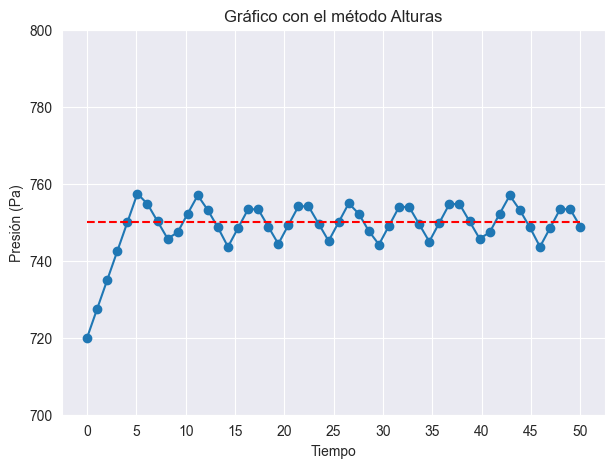

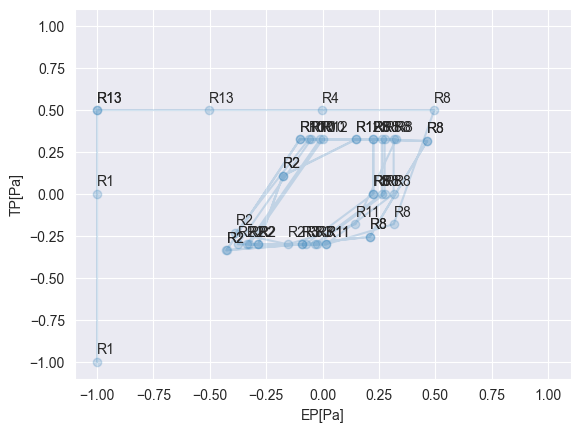

--------------------
Condición inicial: 830 Pa
--------------------
Método de desdifución: PS

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


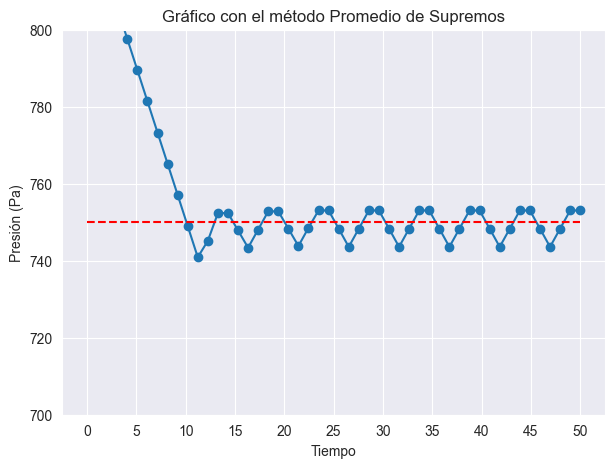

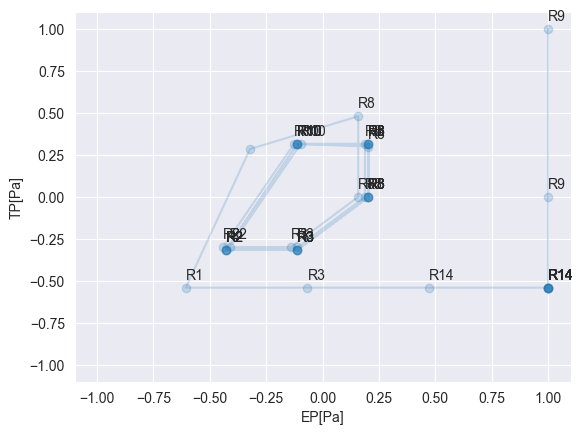

Método de desdifución: CG

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


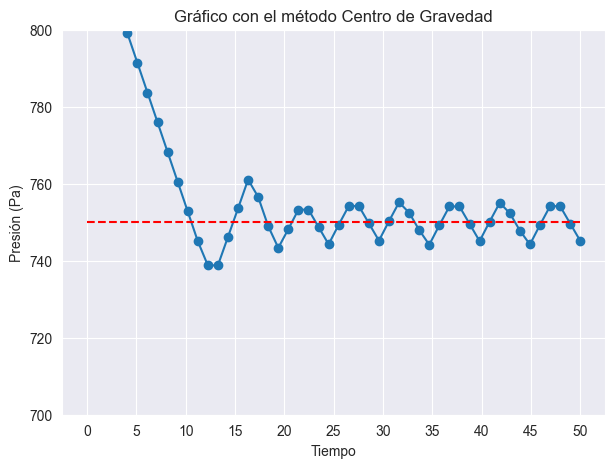

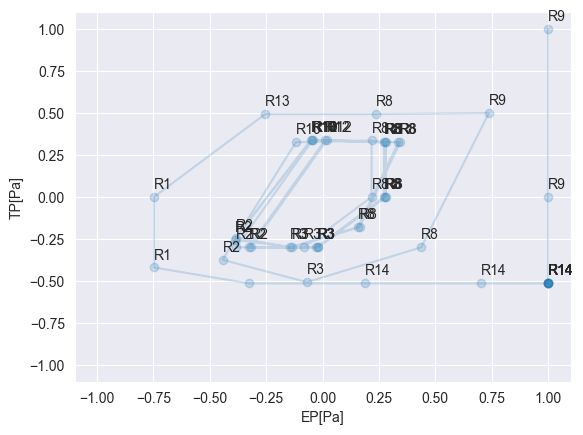

Método de desdifución: A

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t-1) usando lógica difusa.


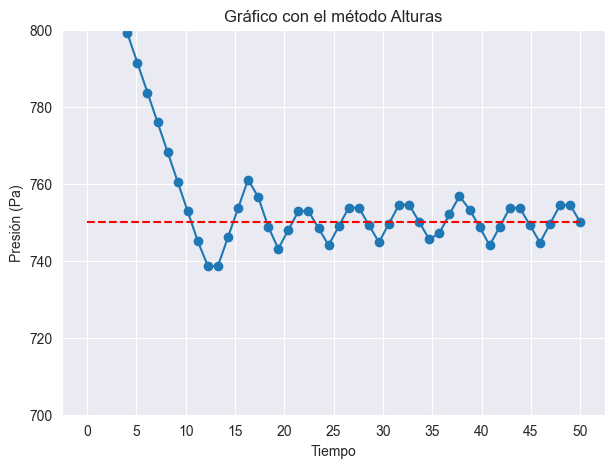

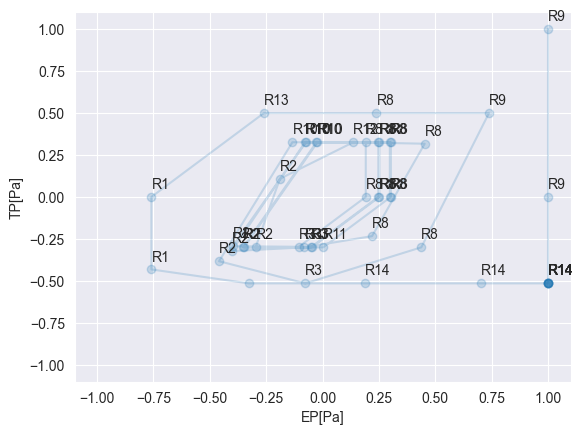

In [52]:
claves = list(mapa_reglas_copy.keys())
del mapa_reglas_copy[claves[10]]
simulaciones(mapa_reglas=mapa_reglas_copy, plots = [True, False, True])

### f) Realice cambios en la base de conocimientos, ya sea variando los conjuntos difusos o agregando reglas de manera de obtener un CLD con mejor desempeño

### g) ¿Cuál es el número mínimo de reglas que Ud. debe remover (eliminar) para tener un controlador con un comportamiento inaceptable? Simule bajo estas condiciones y compare con el sistema definido al comienzo


## CLD Exacto

In [28]:
# Se definen condiciones iniciales y restricciones para los valores difusos.
T = 50  # (s) Tiempo de simulación
fs = 1  # (Hz) frecuencia de muestreo de simulación
rango_EP = [-15, 15]  # Rango de error de presión
rango_TP = [-15, 15]  # Rango de tasa de error de presión
rango_deltaH = [-15, 15]  # Rango de deltaH
K = 0.6  # Constante P=K*H
C = 0.01
P_obj = 750  # (Pa) Presión objetivo
P_inicial = 830 # (Pa) Presión inicial
metodo_desdifusion = "PS"  #Centro de gravedad: "CG", Altura: "A", Promedio Supremos "PS"

# Se crea clase de controlador CLD
CLD = Simulacion_CLD(T, fs, mapa_reglas, rango_EP=rango_EP, rango_TP=rango_TP, 
                     rango_deltaH=rango_deltaH, K=K, C=C, P_obj=P_obj, P_inicial=P_inicial,
                     metodo_desdifusion=metodo_desdifusion, tipo="exacto")

Se creó el simulador para el controlador difuso con los siguientes parámetros.
duración = 50 [s]
frec_muestreo = 1 [Hz]
rango_EP = [-15, 15]
rango_TP = [-15, 15]
rango_deltaH = [-15, 15]
P_objetivo = 750 [Pa]
P_inicial = 830 [Pa]
La variable a controlar es dP(t)=0.6*dH(t)+0.01*dP(t-1) usando lógica difusa.


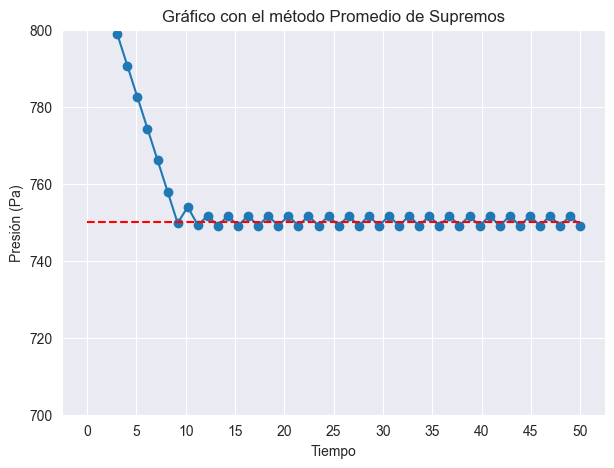

In [29]:
CLD.run_sim(ep_anterior=0, verbose=False, participacion=True, nombre="experimento2.csv")
CLD.plot_sim()

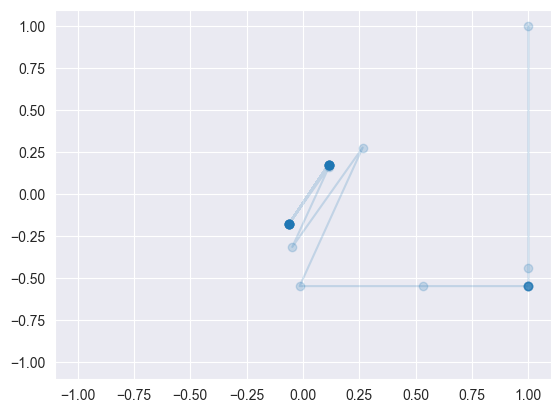

In [30]:
data_participacion = pd.read_csv("experimento2.csv", index_col=0)
# data_participacion= data_participacion.drop("Unnamed: 0", axis=1)
plt.plot(data_participacion["EP"], data_participacion["TP"], "-o", alpha=0.2)
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])
plt.show()

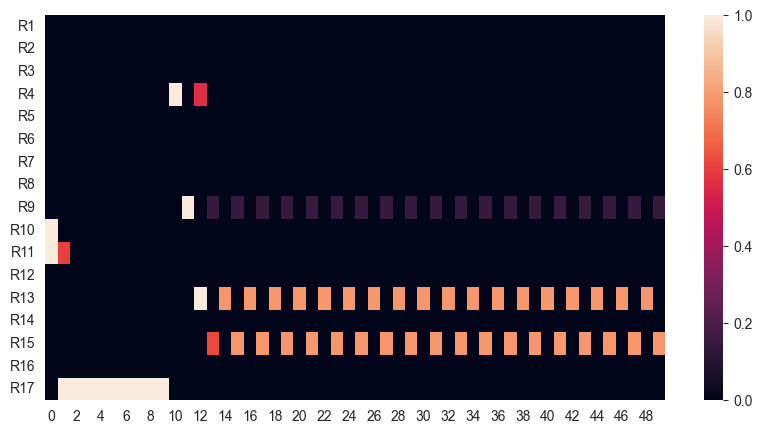

In [31]:
data_participacion = pd.read_csv("regla_participacion_experimento2.csv", index_col=0)
plt.figure(figsize=(10,5))
sns.heatmap(data_participacion.T)
plt.show()

# Proceso de eliminación de Reglas